In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import joblib

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), make_column_selector(dtype_include='object')),
        ('scale', StandardScaler(), make_column_selector(dtype_include="number"))
         ],
    remainder="passthrough"
)
#strategy='most_frequent', ("PCA", PCA(n_components=3))
pipe = Pipeline([("Preprocessing", preprocessor), ('Imputer', SimpleImputer(strategy='most_frequent')), ('Outlier', LocalOutlierFactor(n_neighbors=20, contamination=0.1))], verbose=True)

In [14]:
df = sns.load_dataset('iris')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
pipe.fit(X)

[Pipeline] ..... (step 1 of 3) Processing Preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing Imputer, total=   0.0s
[Pipeline] ........... (step 3 of 3) Processing Outlier, total=   0.0s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fafa4ffef00>),
                                                 ('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fafa4ffce30>)])),
                ('Imputer', SimpleImputer(strategy='most_frequent')),
                ('Outlier', LocalOutlierFactor(contamination=0.1))],
         verbose=True)

In [16]:
df_mod = pipe[:-1].transform(X)
df_mod_columns = pipe[:-1].get_feature_names_out()

In [17]:
df_mod = pd.DataFrame(df_mod, columns=df_mod_columns)

In [18]:
df_mod.head()

,scale__sepal_length,scale__sepal_width,scale__petal_length,scale__petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [19]:
df_mod.shape

(150, 4)

<Axes: >

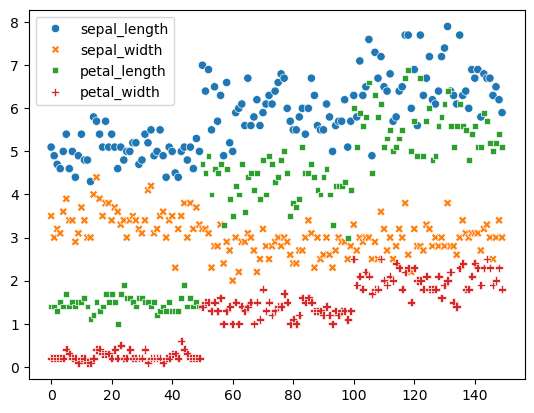

In [20]:
sns.scatterplot(X)

In [21]:
df["target"] = y

<Axes: >

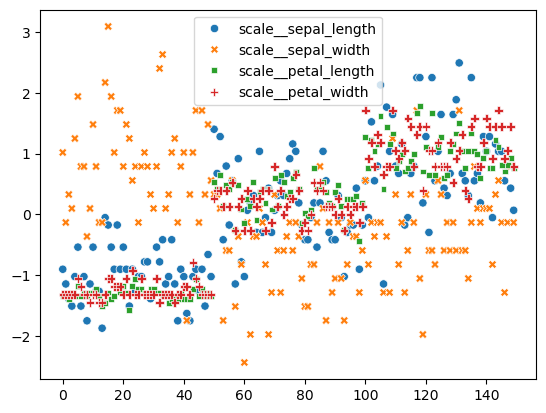

In [22]:
sns.scatterplot(df_mod)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=33)